<a href="https://colab.research.google.com/github/Drew128/Task20200209/blob/master/Task_test3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import files
uploaded = files.upload()

Saving Test_4.csv to Test_4.csv


In [253]:
import pandas as pd
import numpy as np

df = pd.read_csv("Test_4.csv", delimiter=";")
df.head()

,sender_id,platform_id,time_stamp,gender,reg_date
0,3207526951,6,16.03.2017 13:35,m,26.01.2017
1,3207526951,6,16.03.2017 9:09,m,26.01.2017
2,3207526951,6,16.03.2017 9:09,m,26.01.2017
3,3207526951,6,16.03.2017 12:13,m,26.01.2017
4,3207526951,6,15.03.2017 14:01,m,26.01.2017


In [0]:
# to do
# axes: gender, date registration (before test, after test), platform, group(A/B)
# metric seems like log count per user

In [254]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df['time_stamp'] = pd.to_datetime(df['time_stamp'], format="%d.%m.%Y %H:%M", errors = 'coerce')
df['reg_date'] = pd.to_datetime(df['reg_date'], format="%d.%m.%Y", errors = 'coerce')

test_start = pd.to_datetime('2017-03-24 16:00', format='%Y-%m-%d %H:%M')

df['variant'] = df['sender_id'].apply(lambda x: "A" if x%2 == 0 else "B") 
df['isTestAlready'] = df['time_stamp'] > test_start
df['isNewUser'] =  df['reg_date'] > test_start

df.head()


,sender_id,platform_id,time_stamp,gender,reg_date,variant,isTestAlready,isNewUser
0,3207526951,6,2017-03-16 13:35:00,m,2017-01-26,B,False,False
1,3207526951,6,2017-03-16 09:09:00,m,2017-01-26,B,False,False
2,3207526951,6,2017-03-16 09:09:00,m,2017-01-26,B,False,False
3,3207526951,6,2017-03-16 12:13:00,m,2017-01-26,B,False,False
4,3207526951,6,2017-03-15 14:01:00,m,2017-01-26,B,False,False


In [255]:
print('event dates from: ', df['time_stamp'].min(), '\nto: ', df['time_stamp'].max())
print('\n registration dates from: ', df['reg_date'].min(), '\nto: ', df['reg_date'].max())

event dates from:  2017-03-13 00:00:00 
to:  2017-03-27 00:00:00

 registration dates from:  2017-01-01 00:00:00 
to:  2017-03-26 00:00:00


In [256]:
print('sender_id:', df['sender_id'].nunique(), 'platform_id:', df['platform_id'].unique(), 'gender:', df['gender'].unique())

sender_id: 26321 platform_id: [6 7] gender: ['m' 'f' ' ']


In [0]:
cnt_per_user = df.groupby(['sender_id',	'platform_id',	'gender',	'variant',	'isTestAlready',	'isNewUser'])[['time_stamp']].count()
cnt_per_user.reset_index(inplace=True)
mean_likes = cnt_per_user.groupby(['platform_id',	'gender',	'variant',	'isTestAlready',	'isNewUser'])[['time_stamp']].mean()
mean_likes

time_stamp
platform_id gender variant isTestAlready isNewUser            
6                  B       False         False       33.000000
                           True          False       16.000000
            f      A       False         False       22.202514
                           True          False        9.880795
                                         True        12.100000
                   B       False         False       27.976515
                           True          False       11.180212
                                         True        11.433735
            m      A       False         False       39.145327
                           True          False       21.155807
                                         True        14.121094
                   B       False         False       41.183237
                           True          False       18.945455
                                         True        14.326446
7                  A       False         False       36.000000
                   B       False         False       79.000000
                           True          False        7.000000
            f      A       False         False        8.823929
                           True          False        6.441718
                                         True         6.013423
                   B       False         False        9.070679
                           True          False        6.233227
                                         True         7.266129
            m      A       False         False       25.749088
                           True          False       15.783435
                                         True        14.060150
                   B       False         False       24.159943
                           True          False       12.458806
                                         True        13.391667

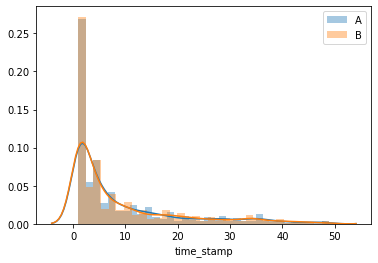

In [0]:
a = cnt_per_user['time_stamp'][(cnt_per_user['time_stamp'] < 50) & (cnt_per_user['variant'] == 'A') & (cnt_per_user['isTestAlready'] == True)]
b = cnt_per_user['time_stamp'][(cnt_per_user['time_stamp'] < 50) & (cnt_per_user['variant'] == 'B') & (cnt_per_user['isTestAlready'] == True)]
sns.distplot(a)
sns.distplot(b)
plt.legend(['A', 'B'])

In [0]:
# it's hard to find a differences on this kind of distribution
# lets try Nonparametric tests

In [0]:
from scipy.stats import mannwhitneyu
from scipy.stats import wilcoxon

def ab_test(a, b):
  stat, p = mannwhitneyu(a, b)
  print('The null hypothesis: no metter what this button looks like')
  print(f'A group mean: {a.mean()}, \nB group mean: {b.mean()}, \nMann–Whitney U test:       P-value {p}')
  min_shape = min(a.shape[0], b.shape[0])
  stat, p = wilcoxon(a[:min_shape], b[:min_shape])
  print(f'Wilcoxon signed-rank test: P-value {p}')

ab_test(a, b)

The null hypothesis: no metter what this button looks like
A group mean: 12.273324572930354, 
B group mean: 12.381712626995645, 
Mann–Whitney U test:       P-value 0.2783534609754176
Wilcoxon signed-rank test: P-value 0.9978326031468208


In [0]:
# let's start from the begining \n
print("so, is the groups have the same results before test?")
a = cnt_per_user['time_stamp'][(cnt_per_user['variant'] == 'A') & (cnt_per_user['isTestAlready'] == False)]
b = cnt_per_user['time_stamp'][(cnt_per_user['variant'] == 'B') & (cnt_per_user['isTestAlready'] == False)]
ab_test(a, b)

so, is the groups have the same results before test?
The null hypothesis: no metter what this button looks like
A group mean: 27.735649674528702, 
B group mean: 28.54979840439221, 
Mann–Whitney U test:       P-value 0.3274723038293801
Wilcoxon signed-rank test: P-value 0.7898626975571797


In [0]:
print('is the groups have the same results after starting the test?')
a = cnt_per_user['time_stamp'][(cnt_per_user['variant'] == 'A') & (cnt_per_user['isTestAlready'] == True)]
b = cnt_per_user['time_stamp'][(cnt_per_user['variant'] == 'B') & (cnt_per_user['isTestAlready'] == True)]
ab_test(a, b)

is the groups have the same results after starting the test?
The null hypothesis: no metter what this button looks like
A group mean: 15.302603613177471, 
B group mean: 13.666210670314637, 
Mann–Whitney U test:       P-value 0.24317468071929654
Wilcoxon signed-rank test: P-value 0.62941357658686


In [0]:
print("how about new users, which can't see the old design")
a = cnt_per_user['time_stamp'][(cnt_per_user['variant'] == 'A') & (cnt_per_user['isTestAlready'] == True) & (cnt_per_user['isNewUser'] == True)]
b = cnt_per_user['time_stamp'][(cnt_per_user['variant'] == 'B') & (cnt_per_user['isTestAlready'] == True) & (cnt_per_user['isNewUser'] == True)]
ab_test(a, b)

how about new users, which can't see the old design
The null hypothesis: no metter what this button looks like
A group mean: 12.273324572930354, 
B group mean: 12.381712626995645, 
Mann–Whitney U test:       P-value 0.2783534609754176
Wilcoxon signed-rank test: P-value 0.9978326031468208


In [0]:
print('how about old users, which can see the old version')
a = cnt_per_user['time_stamp'][(cnt_per_user['variant'] == 'A') & (cnt_per_user['isTestAlready'] == True) & (cnt_per_user['isNewUser'] == False)]
b = cnt_per_user['time_stamp'][(cnt_per_user['variant'] == 'B') & (cnt_per_user['isTestAlready'] == True) & (cnt_per_user['isNewUser'] == False)]
ab_test(a, b)

how about old users, which can see the old version
The null hypothesis: no metter what this button looks like
A group mean: 16.07026307026307, 
B group mean: 13.9645987862441, 
Mann–Whitney U test:       P-value 0.36523006506611577
Wilcoxon signed-rank test: P-value 0.4357195469270264


In [0]:
print('well how about female?')
a = cnt_per_user['time_stamp'][(cnt_per_user['variant'] == 'A') & (cnt_per_user['isTestAlready'] == True) & (cnt_per_user['gender'] == 'f')]
b = cnt_per_user['time_stamp'][(cnt_per_user['variant'] == 'B') & (cnt_per_user['isTestAlready'] == True) & (cnt_per_user['gender'] == 'f')]
ab_test(a, b)

well how about female?
The null hypothesis: no metter what this button looks like
A group mean: 8.153402537485583, 
B group mean: 8.673723536737235, 
Mann–Whitney U test:       P-value 0.2637295921058278
Wilcoxon signed-rank test: P-value 0.23008856591204518


In [0]:
print('male?')
a = cnt_per_user['time_stamp'][(cnt_per_user['variant'] == 'A') & (cnt_per_user['isTestAlready'] == True) & (cnt_per_user['gender'] == 'm')]
b = cnt_per_user['time_stamp'][(cnt_per_user['variant'] == 'B') & (cnt_per_user['isTestAlready'] == True) & (cnt_per_user['gender'] == 'm')]
ab_test(a, b)

male?
The null hypothesis: no metter what this button looks like
A group mean: 17.44218156713842, 
B group mean: 15.074385964912281, 
Mann–Whitney U test:       P-value 0.11071588827654322
Wilcoxon signed-rank test: P-value 0.3382689407463667


In [0]:
# it was close
print("let's check old users male and new users male")
print('old users male')
a = cnt_per_user['time_stamp'][(cnt_per_user['variant'] == 'A') & (cnt_per_user['isTestAlready'] == True) & (cnt_per_user['gender'] == 'm') & (cnt_per_user['isNewUser'] == False)]
b = cnt_per_user['time_stamp'][(cnt_per_user['variant'] == 'B') & (cnt_per_user['isTestAlready'] == True) & (cnt_per_user['gender'] == 'm') & (cnt_per_user['isNewUser'] == False)]
ab_test(a, b)

let's check old users male and new users male
old users male
The null hypothesis: no metter what this button looks like
A group mean: 18.178947368421053, 
B group mean: 15.321368243243244, 
Mann–Whitney U test:       P-value 0.20813187358711466
Wilcoxon signed-rank test: P-value 0.5051595556010078


In [0]:
print('new users male')
a = cnt_per_user['time_stamp'][(cnt_per_user['variant'] == 'A') & (cnt_per_user['isTestAlready'] == True) & (cnt_per_user['gender'] == 'm') & (cnt_per_user['isNewUser'] == True)]
b = cnt_per_user['time_stamp'][(cnt_per_user['variant'] == 'B') & (cnt_per_user['isTestAlready'] == True) & (cnt_per_user['gender'] == 'm') & (cnt_per_user['isNewUser'] == True)]
ab_test(a, b)

new users male
The null hypothesis: no metter what this button looks like
A group mean: 14.090038314176246, 
B group mean: 13.860995850622407, 
Mann–Whitney U test:       P-value 0.16134948111589426
Wilcoxon signed-rank test: P-value 0.6370523670544578


In [0]:
print("let's check old users female and new users female")
print('old users female')
a = cnt_per_user['time_stamp'][(cnt_per_user['variant'] == 'A') & (cnt_per_user['isTestAlready'] == True) & (cnt_per_user['gender'] == 'f') & (cnt_per_user['isNewUser'] == False)]
b = cnt_per_user['time_stamp'][(cnt_per_user['variant'] == 'B') & (cnt_per_user['isTestAlready'] == True) & (cnt_per_user['gender'] == 'f') & (cnt_per_user['isNewUser'] == False)]
ab_test(a, b)

let's check old users female and new users female
old users female
The null hypothesis: no metter what this button looks like
A group mean: 8.095541401273886, 
B group mean: 8.582214765100671, 
Mann–Whitney U test:       P-value 0.27807746326846866
Wilcoxon signed-rank test: P-value 0.18740807172413976


In [0]:
print('new users female')
a = cnt_per_user['time_stamp'][(cnt_per_user['variant'] == 'A') & (cnt_per_user['isTestAlready'] == True) & (cnt_per_user['gender'] == 'f') & (cnt_per_user['isNewUser'] == True)]
b = cnt_per_user['time_stamp'][(cnt_per_user['variant'] == 'B') & (cnt_per_user['isTestAlready'] == True) & (cnt_per_user['gender'] == 'f') & (cnt_per_user['isNewUser'] == True)]
ab_test(a, b)

new users female
The null hypothesis: no metter what this button looks like
A group mean: 8.305439330543933, 
B group mean: 8.93719806763285, 
Mann–Whitney U test:       P-value 0.24415944316473104
Wilcoxon signed-rank test: P-value 0.5352254220486811


In [0]:
def get_bootstrap_samples(data, n_samples):
  indices = np.random.randint(0, len(data), size=(n_samples, len(data)))
  samples = np.array(data)[indices]
  return samples

def stat_intervals(stat, alpha=0.05):
  boundaries = np.percentile(stat, [100 * alpha / 2., 100 * (1 - alpha / 2.)])
  return boundaries

def statistic_func(samples):
  return np.array([np.mean(sample) for sample in samples])

def pipline(data):
  samples = get_bootstrap_samples(data, 5000)
  statistic = statistic_func(samples)
  intervals = stat_intervals(statistic)
  return {"intervals":intervals, "statistic":statistic}

Result for female
A intervals:  [7.18220877 9.25152826]
B intervals:  [7.58153798 9.90666252]


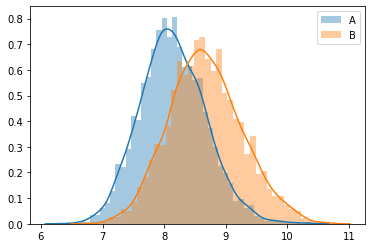

In [0]:
a = cnt_per_user['time_stamp'][(cnt_per_user['variant'] == 'A') & (cnt_per_user['isTestAlready'] == True) & (cnt_per_user['gender'] == 'f')]
b = cnt_per_user['time_stamp'][(cnt_per_user['variant'] == 'B') & (cnt_per_user['isTestAlready'] == True) & (cnt_per_user['gender'] == 'f')]
a_stat = pipline(a)
b_stat = pipline(b)

sns.distplot(a_stat['statistic'])
sns.distplot(b_stat['statistic'])
plt.legend(['A', 'B'])
print('Result for female')
print('A intervals: ', a_stat["intervals"])
print('B intervals: ', b_stat["intervals"])

Difference intervals:  [-1.03950393  2.09639777]
B-variant on female audience about 6.3 % better
But it`s not a statisticaly significant result =(


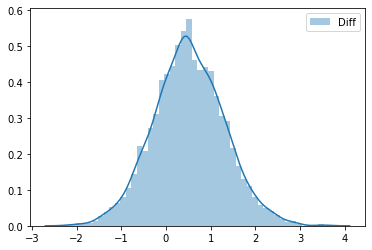

In [0]:
diff = b_stat['statistic']-a_stat['statistic']
sns.distplot(diff)
plt.legend(['Diff'])
print('Difference intervals: ', stat_intervals(diff))
print(f"B-variant on female audience about {round(diff.mean()/a_stat['statistic'].mean()*100, 2)} % better")
print("But it`s not a statisticaly significant result =(")


Result for male
A intervals:  [15.77626855 19.30275285]
B intervals:  [14.04877193 16.14280702]


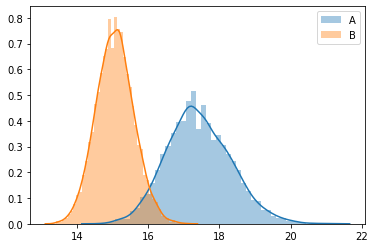

In [0]:
a = cnt_per_user['time_stamp'][(cnt_per_user['variant'] == 'A') & (cnt_per_user['isTestAlready'] == True) & (cnt_per_user['gender'] == 'm')]
b = cnt_per_user['time_stamp'][(cnt_per_user['variant'] == 'B') & (cnt_per_user['isTestAlready'] == True) & (cnt_per_user['gender'] == 'm')]
a_stat = pipline(a)
b_stat = pipline(b)

sns.distplot(a_stat['statistic'])
sns.distplot(b_stat['statistic'])
plt.legend(['A', 'B'])
print('Result for male')
print('A intervals: ', a_stat["intervals"])
print('B intervals: ', b_stat["intervals"])

Difference intervals:  [-4.40132178 -0.41359053]
B-variant for male audience about -13.5 % likes worse
But it`s not a statisticaly significant result =(


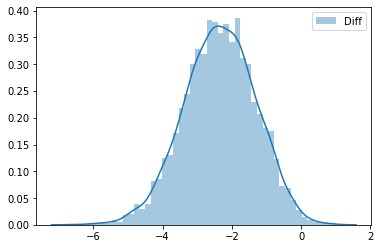

In [0]:
diff = b_stat['statistic']-a_stat['statistic']
sns.distplot(diff)
plt.legend(['Diff'])
print('Difference intervals: ', stat_intervals(diff))
print(f"B-variant for male audience about {round(diff.mean()/a_stat['statistic'].mean()*100, 2)} % (in likes qnt) worse")
print("But it`s not a statisticaly significant result =(")

Result for genders
m intervals:  [15.22532191 17.38594919]
f intervals:  [7.64070359 9.22217066]
third intervals:  [ 7. 16.]


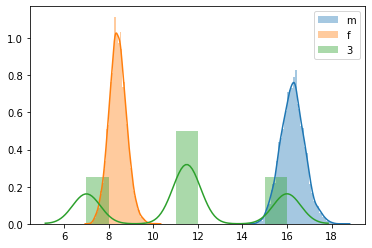

In [272]:
m = cnt_per_user['time_stamp'][(cnt_per_user['isTestAlready'] == True) & (cnt_per_user['gender'] == 'm')]
f = cnt_per_user['time_stamp'][(cnt_per_user['isTestAlready'] == True) & (cnt_per_user['gender'] == 'f')]
third_gender = cnt_per_user['time_stamp'][(cnt_per_user['isTestAlready'] == True) & (cnt_per_user['gender'] == ' ')]
m_stat = pipline(m)
f_stat = pipline(f)
third_stat = pipline(third_gender)

sns.distplot(m_stat['statistic'])
sns.distplot(f_stat['statistic'])
sns.distplot(third_stat['statistic'])
plt.legend(['m', 'f', '3'])
print('Result for genders')
print('m intervals: ', m_stat["intervals"])
print('f intervals: ', f_stat["intervals"])
print('third intervals: ', third_stat["intervals"])